In [35]:
import numpy as np 
import pandas as pd

In [36]:
df = pd.read_csv("gurgaon_properties_missing_value_imputation.csv")

In [37]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,smart world gems,sector 89,0.95,8597.0,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,breez global hill view,sohna road,0.32,5470.0,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,suncity avenue,sector 102,0.48,9023.0,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


In [38]:
df.sector.unique()

array(['sector 36', 'sector 89', 'sohna road', 'sector 92', 'sector 102',
       'gwal pahari', 'sector 108', 'sector 105', 'sector 26',
       'sector 109', 'sector 28', 'sector 65', 'sector 12', 'sector 85',
       'sector 70a', 'sector 30', 'sector 107', 'sector 3', 'sector 2',
       'sector 41', 'sector 4', 'sector 62', 'sector 49', 'sector 81',
       'sector 66', 'sector 86', 'sector 48', 'sector 51', 'sector 37',
       'sector 111', 'sector 67', 'sector 113', 'sector 13', 'sector 61',
       'sector 69', 'sector 67a', 'sector 37d', 'sector 82', 'sector 53',
       'sector 74', 'sector 52', 'sector 43', 'sector 14', 'sector 25',
       'sector 95', 'sector 56', 'sector 83', 'sector 104', 'sector 88a',
       'sector 55', 'sector 50', 'sector 84', 'sector 91', 'sector 76',
       'sector 82a', 'sector 78', 'manesar', 'sector 93', 'sector 7',
       'sector 71', 'sector 110', 'sector 33', 'sector 70', 'sector 103',
       'sector 90', 'sector 38', 'sector 79', 'sector 112', 'sect

In [39]:
len(df.sector.unique())

104

In [40]:
lat_long = pd.read_csv("gurgaon_sector_coordinates.csv")

In [41]:
lat_long

,sector,latitude,longitude
0,Sector 36,28.419334,76.988926
1,Sector 89,28.418446,76.945757
2,Sohna Road,28.383655,77.053428
3,Sector 92,28.408905,76.915523
4,Sector 102,28.475487,76.971175
...,...,...,...
99,Sector 73,28.408808,77.016169
100,Sector 54,28.441611,77.111872
101,Sector 8,28.459897,77.019804
102,Sector 88,28.421965,76.956808


In [42]:
lat_long['sector'] = lat_long['sector'].str.lower()

In [43]:
new_df = df.merge(lat_long, on='sector')

In [44]:
new_df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_score', 'latitude',
       'longitude'],
      dtype='object')

In [45]:
new_df['sector'].value_counts()

sector
sohna road    163
sector 85     108
sector 102    107
sector 92     100
sector 69      93
             ... 
sector 40       5
sector 80       5
sector 73       3
sector 88       3
sector 27       2
Name: count, Length: 104, dtype: int64

In [46]:
new_df['latitude'].value_counts()

latitude
28.383655    163
28.423248    135
28.403652    108
28.475487    107
28.408905    100
            ... 
28.450043      5
28.370217      5
28.408808      3
28.421965      3
28.464657      2
Name: count, Length: 100, dtype: int64

In [47]:
# Only keep numeric columns during groupby mean
group_df = new_df.groupby('sector').mean(numeric_only=True)[['price', 'price_per_sqft', 'built_up_area', 'latitude', 'longitude']]


In [48]:
group_df.rename(columns = {"price_per_sqft":"Average Price-per-sqft",
                "built_up_area" :"Average Built-up-Area",
                "price":"Average Price"},inplace = True)

In [49]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [50]:

# fig = px.scatter_mapbox(group_df, lat="latitude", lon="longitude", color="Average Price-per-sqft", size='Average Built-up-Area',
#                   color_continuous_scale=px.colors.cyclical.IceFire, zoom=10,
#                   mapbox_style="open-street-map",text=group_df.index)
# fig.show()


In [51]:
new_df.to_csv('data_viz1.csv',index=False)


In [52]:
new_df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_score', 'latitude',
       'longitude'],
      dtype='object')

In [53]:
new_df['property_type'].unique()

array(['flat', 'house'], dtype=object)

In [54]:
new_df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,latitude,longitude
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,28.419334,76.988926
1,flat,smart world gems,sector 89,0.95,8597.0,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0,28.418446,76.945757
2,flat,breez global hill view,sohna road,0.32,5470.0,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,28.383655,77.053428
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0,28.408905,76.915523
4,flat,suncity avenue,sector 102,0.48,9023.0,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0,28.475487,76.971175


In [55]:
df1 = pd.read_csv("gurgaon_properties.csv")

In [56]:
df1.shape

(3961, 20)

In [57]:
df.shape

(3554, 18)

In [58]:
new_df.shape

(3554, 20)

In [59]:
wordcloud_df = df1.merge(df , left_index= True , right_index=True)[['features', 'sector']]

In [69]:
wordcloud_df.to_pickle("wordcloud_df.pkl")

In [61]:
import ast
main = []
for item in wordcloud_df['features'].dropna().apply(ast.literal_eval):
    main.extend(item)

In [62]:
from wordcloud import WordCloud


In [63]:
feature_text = ' '.join(main)


In [64]:
feature_text

'Lift(s) Park Power Back-up Intercom Facility Lift(s) Swimming Pool Park Piped-gas Internet/wi-fi connectivity Fitness Centre / GYM Club house / Community Center Intercom Facility Lift(s) Park Feng Shui / Vaastu Compliant Security / Fire Alarm Intercom Facility Lift(s) Maintenance Staff Water Storage Park Visitor Parking Centrally Air Conditioned Water purifier Security / Fire Alarm Feng Shui / Vaastu Compliant Private Garden / Terrace Intercom Facility Lift(s) High Ceiling Height Maintenance Staff False Ceiling Lighting Water Storage Separate entry for servant room No open drainage around Bank Attached Property Piped-gas Internet/wi-fi connectivity Recently Renovated Visitor Parking Swimming Pool Park Security Personnel Natural Light Airy Rooms Spacious Interiors Low Density Society Waste Disposal Rain Water Harvesting Water softening plant Shopping Centre Fitness Centre / GYM Club house / Community Center Centrally Air Conditioned Water purifier Security / Fire Alarm Feng Shui / Vaas

In [65]:

import pickle
pickle.dump(feature_text, open('feature_text.pkl','wb'))

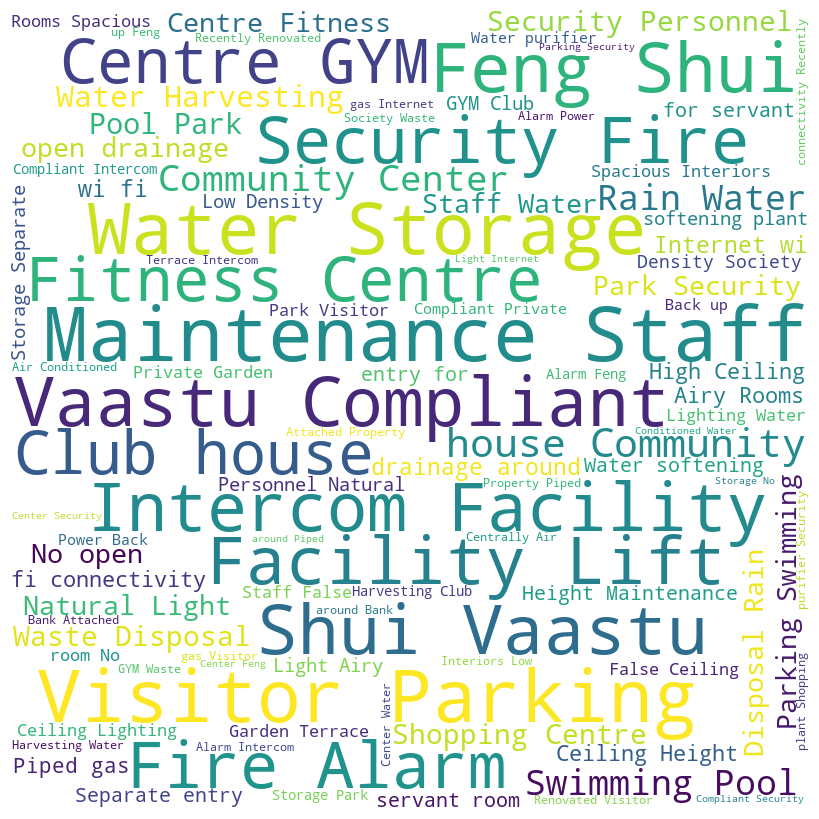

In [66]:

plt.rcParams["font.family"] = "Arial"

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      stopwords = set(['s']),  # Any stopwords you'd like to exclude
                      min_font_size = 10).generate(feature_text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() # st.pyplot()


In [68]:
data = dict(
    names=["A", "B", "C", "D", "E", "F"],
    parents=["", "", "", "A", "A", "C"],
    values=[10, 20, 30, 40, 50, 60],
)

fig = px.sunburst(
    df1,
    names='property_type',
    values='price_per_sqft',
    parents='bedRoom',
    title="Sample Sunburst Chart"
)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [70]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3554 entries, 0 to 3553
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3554 non-null   object 
 1   society          3554 non-null   object 
 2   sector           3554 non-null   object 
 3   price            3554 non-null   float64
 4   price_per_sqft   3554 non-null   float64
 5   bedRoom          3554 non-null   float64
 6   bathroom         3554 non-null   float64
 7   balcony          3554 non-null   object 
 8   floorNum         3554 non-null   float64
 9   agePossession    3554 non-null   object 
 10  built_up_area    3554 non-null   float64
 11  study room       3554 non-null   float64
 12  servant room     3554 non-null   float64
 13  store room       3554 non-null   float64
 14  pooja room       3554 non-null   float64
 15  others           3554 non-null   float64
 16  furnishing_type  3554 non-null   float64
 17  luxury_score  